# Pandas  的应用

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%config InlineBackend.figure_format = 'svg'

## Series

### 创建Series对象

In [3]:
# 1
ser1 = pd.Series([122,98,45,79],index = ['一季度','二季度','三季度','四季度'])  # index（*季度）可重复，但在通过该index索引数据时，得到的是一个新的Series
ser1

一季度    122
二季度     98
三季度     45
四季度     79
dtype: int64

In [4]:
# 2
ser2 = pd.Series({
    '一季度':999,
    '二季度':998,
    '三季度':997,
    '四季度':996,
})
ser2
# 通过字典创建数据系列时，当键（index）重复时，后者覆盖前者

一季度    999
二季度    998
三季度    997
四季度    996
dtype: int64

In [5]:
# 切片
# index切片时左闭右开
ser2[0:2]

一季度    999
二季度    998
dtype: int64

In [6]:
# 通过自己给定的索引切片时，两边均闭合
ser2['一季度':'三季度']

一季度    999
二季度    998
三季度    997
dtype: int64

In [7]:
# 布尔索引
ser1[ser1 > 100]

一季度    122
dtype: int64

In [8]:
# 花式索引
ser1[['一季度','四季度']],ser2[[1,3]]

(一季度    122
 四季度     79
 dtype: int64,
 二季度    998
 四季度    996
 dtype: int64)

### Series 的属性 / 方法

In [9]:
# Series的值obj.values
ser2.values

array([999, 998, 997, 996], dtype=int64)

In [10]:
# Series 的index的值 obj.index.values
ser2.index.values

array(['一季度', '二季度', '三季度', '四季度'], dtype=object)

In [11]:
# Series 中的数据是否单调
ser2.is_monotonic

False

In [12]:
# 描述性统计信息
des = ser2.describe()
des

count      4.000000
mean     997.500000
std        1.290994
min      996.000000
25%      996.750000
50%      997.500000
75%      998.250000
max      999.000000
dtype: float64

In [13]:
des['min'],des['25%']

(996.0, 996.75)

In [14]:
ser3 = pd.Series([122,98,45,79,79,122],index = ['一季度','二季度','三季度','四季度','四季度','一季度'])
ser3

一季度    122
二季度     98
三季度     45
四季度     79
四季度     79
一季度    122
dtype: int64

In [15]:
# 独一无二的值
ser3.unique()

array([122,  98,  45,  79], dtype=int64)

In [16]:
# 不重复的值  返回个数
ser3.nunique()

4

In [17]:
# 删除重复值
ser3_ = ser3.drop_duplicates()
ser3_

一季度    122
二季度     98
三季度     45
四季度     79
dtype: int64

In [18]:
# 重复值
ser3.duplicated()

一季度    False
二季度    False
三季度    False
四季度    False
四季度     True
一季度     True
dtype: bool

In [19]:
# 统计频次
ser3.value_counts()

122    2
79     2
98     1
45     1
dtype: int64

In [20]:
ser4 = pd.Series([122,98,np.nan,45,79,np.nan],index = ['一季度','二季度','三季度','四季度','五季度','六季度'])
ser4

一季度    122.0
二季度     98.0
三季度      NaN
四季度     45.0
五季度     79.0
六季度      NaN
dtype: float64

In [21]:
# 是否含有空值
ser4.isnull(),ser4.notnull()

(一季度    False
 二季度    False
 三季度     True
 四季度    False
 五季度    False
 六季度     True
 dtype: bool,
 一季度     True
 二季度     True
 三季度    False
 四季度     True
 五季度     True
 六季度    False
 dtype: bool)

In [22]:
# 删除重复值
ser4.dropna()

一季度    122.0
二季度     98.0
四季度     45.0
五季度     79.0
dtype: float64

In [23]:
# 指定值填充空值
ser4.fillna(100)

一季度    122.0
二季度     98.0
三季度    100.0
四季度     45.0
五季度     79.0
六季度    100.0
dtype: float64

In [24]:
# 将空值填充为平均值
ser4.fillna(ser4.mean())

一季度    122.0
二季度     98.0
三季度     86.0
四季度     45.0
五季度     79.0
六季度     86.0
dtype: float64

In [25]:
# 用空值的前(ffill)/后(bfill)一个数据填充空值
ser4.fillna(method='ffill')

一季度    122.0
二季度     98.0
三季度     98.0
四季度     45.0
五季度     79.0
六季度     79.0
dtype: float64

In [26]:
ser5 = pd.Series(np.arange(1,10))
ser5

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int32

In [27]:
# 返回满足条件的值以指定值填充不满足条件的值（默认填充为空值）
ser5.where(ser5<5),ser5.where(ser5<5,99)

(0    1.0
 1    2.0
 2    3.0
 3    4.0
 4    NaN
 5    NaN
 6    NaN
 7    NaN
 8    NaN
 dtype: float64,
 0     1
 1     2
 2     3
 3     4
 4    99
 5    99
 6    99
 7    99
 8    99
 dtype: int32)

In [28]:
# 返回不满足条件的值以指定值填充满足条件的值（默认填充为空值）
ser5.mask(ser5<5),ser5.mask(ser5<5,99)

(0    NaN
 1    NaN
 2    NaN
 3    NaN
 4    5.0
 5    6.0
 6    7.0
 7    8.0
 8    9.0
 dtype: float64,
 0    99
 1    99
 2    99
 3    99
 4     5
 5     6
 6     7
 7     8
 8     9
 dtype: int32)

In [29]:
ser6 = pd.Series(np.random.randint(30,80,50))
ser6

0     72
1     33
2     44
3     30
4     44
5     78
6     56
7     56
8     55
9     72
10    70
11    74
12    41
13    74
14    55
15    76
16    54
17    66
18    63
19    62
20    54
21    32
22    46
23    52
24    57
25    54
26    43
27    64
28    77
29    62
30    46
31    53
32    59
33    72
34    50
35    73
36    58
37    77
38    72
39    49
40    73
41    65
42    74
43    30
44    32
45    79
46    40
47    76
48    41
49    72
dtype: int32

In [30]:
ser6.map(lambda x: round((x ** 0.5 * 10),0))

0     85.0
1     57.0
2     66.0
3     55.0
4     66.0
5     88.0
6     75.0
7     75.0
8     74.0
9     85.0
10    84.0
11    86.0
12    64.0
13    86.0
14    74.0
15    87.0
16    73.0
17    81.0
18    79.0
19    79.0
20    73.0
21    57.0
22    68.0
23    72.0
24    75.0
25    73.0
26    66.0
27    80.0
28    88.0
29    79.0
30    68.0
31    73.0
32    77.0
33    85.0
34    71.0
35    85.0
36    76.0
37    88.0
38    85.0
39    70.0
40    85.0
41    81.0
42    86.0
43    55.0
44    57.0
45    89.0
46    63.0
47    87.0
48    64.0
49    85.0
dtype: float64

In [31]:
# 排序与头部值
ser7 = pd.Series([99,54,78,35,86],['apple', 'banana', 'pitaya', 'pitaya', 'durian'])
ser7

apple     99
banana    54
pitaya    78
pitaya    35
durian    86
dtype: int64

In [32]:
ser7.sort_values(inplace=True)
ser7

pitaya    35
banana    54
pitaya    78
durian    86
apple     99
dtype: int64

In [33]:
ser7.sort_index(inplace = True)
ser7

apple     99
banana    54
durian    86
pitaya    35
pitaya    78
dtype: int64

In [34]:
ser7.nlargest(3),ser7.nsmallest(3)

(apple     99
 durian    86
 pitaya    78
 dtype: int64,
 pitaya    35
 banana    54
 pitaya    78
 dtype: int64)

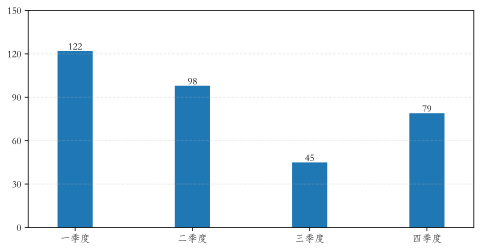

In [35]:
ser1.plot(figsize = (8,4), kind = 'bar', width = 0.3)   # 水平柱状图：barh
plt.grid(True,alpha = 0.3,axis = 'y', linestyle = '--')   # 设置网格线便于观察。alpha设置透明度、axis设置需要添加网格的轴
plt.xticks(rotation = 0)   # 横坐标标签水平显示
plt.yticks(np.arange(0,151,30))   # 订制纵坐标
for i in range(ser1.size):
    plt.text(i,ser1[i] + 1,ser1[i],ha = 'center')
plt.show()

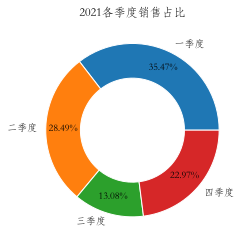

In [36]:
ser1.plot(kind = 'pie',autopct = '%.2f%%',wedgeprops = dict(width = 0.4,edgecolor = 'white'),pctdistance = 0.8)
# wedgeprops = dict(width = 0.4,edgecolor = 'white'),pctdistance = 0.8
# width:环状图宽度；edgecolor：边界颜色；pctdistance：百分比显示距离（距圆心）
plt.ylabel('')
plt.title('2021各季度销售占比')
plt.show()

## DataFrame

In [37]:
# 创建dataframe
scores = np.random.randint(60, 101, (5, 3))
courses = ['语文', '数学', '英语']
ids = [1001, 1002, 1003, 1004, 1005]
df1 = pd.DataFrame(data=scores, columns=courses, index=ids)
df1

,语文,数学,英语
1001,69,62,82
1002,75,80,60
1003,71,67,70
1004,90,96,65
1005,66,89,93


In [38]:
scores = {
    '语文': [62, 72, 93, 88, 93],
    '数学': [95, 65, 86, 66, 87],
    '英语': [66, 75, 82, 69, 82],
}
ids = [1001, 1002, 1003, 1004, 1005]
df2 = pd.DataFrame(data=scores, index=ids)
df2

,语文,数学,英语
1001,62,95,66
1002,72,65,75
1003,93,86,82
1004,88,66,69
1005,93,87,82


In [39]:
df3 = pd.read_csv('../files/data/2018年北京积分落户数据.csv',
                  index_col='id',
#                  quotechar='包围内容的字符（双引号自动去）',
                 )
df3.head()

,name,birthday,company,score
id,,,,
1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79


In [40]:
df4 = pd.read_csv('../files/data/bilibili.csv',encoding='GBK')
df4.head()

,title,url,watchnum,dm,uptime,upname
0,阿里云大学课程（云计算、中间件、大数据、云安全）,//www.bilibili.com/video/BV1Lv411s7wu?from=search,2954,4,2021/1/21,韭菜滚雪球
1,视觉传达设计专业的小朋友大学课程有哪些，强度怎么样，需要什么技能？学姐给新生的解答与建议,//www.bilibili.com/video/BV1Ea4y1a7CX?from=search,3526,8,2020/7/25,铧仔仔儿的奋斗史
2,CAP：适合高中生的大学课程（上大学之前提前学习大学的课程）同济大学《微积分CAP》,//www.bilibili.com/video/BV1X4411Y7u8?from=search,5597,17,2019/5/11,愚甘杂货铺
3,干货！论文读写系列｜写作风格：例文解析（1）｜人文社科｜教育学｜大学课程、知识,//www.bilibili.com/video/BV1VC4y1b7ZA?from=search,1.1万,29,2020/7/26,cici西西熙熙
4,《用户体验与心理-第1期》大学课程,//www.bilibili.com/video/BV1r7411M7gY?from=search,1373,9,2020/2/24,Luka老师


In [41]:
# 以制表符为分隔符的文件
df5 = pd.read_csv('../files/data/chipotle.tsv',delimiter='\t')
df5.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [42]:
df6 = pd.read_excel('../files/data/2020年销售数据.xlsx',header=1,sheet_name = 'Sheet1')
# usecols = [] - 指定列； nrows = 100 - 只读100行； skiprows = np.arange(2,102) - 去跳过前100行
df6.head()

,销售日期,销售信息,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额
0,2020-01-01,上海拼多多订单182894-455,上海,拼多多,182894-455,八匹马,99,83,8217
1,2020-01-01,上海抖音订单205635-402,上海,抖音,205635-402,八匹马,219,29,6351
2,2020-01-01,上海天猫订单205654-021,上海,天猫,205654-021,八匹马,169,85,14365
3,2020-01-01,上海天猫订单205654-519,上海,天猫,205654-519,八匹马,169,14,2366
4,2020-01-01,上海天猫订单377781-010,上海,天猫,377781-010,皮皮虾,249,61,15189


In [43]:
df7 = pd.read_excel('../files/data/口罩销售数据.xlsx')
df7.head()

,日期,销售城市,产品类别,销售员,数量,单价,金额
0,2020-01-01,广州,纯棉口罩,王大锤,6,1,6
1,2020-01-01,武汉,明星口罩,秦红棉,30,30,900
2,2020-01-01,深圳,明星口罩,秦红棉,2,30,60
3,2020-01-03,上海,防雾霾口罩,白元芳,63,28,1764
4,2020-01-04,武汉,明星口罩,白元芳,25,30,750


In [44]:
df8 = pd.read_excel('../files/data/某视频网站运营数据.xlsx')
df8.head()

,video_id,title,channel_title,tags,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,2966,15954
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518


In [45]:
# 连接MYSQL数据库创建DataFrame
import pymysql

conn = pymysql.connect(host = '47.104.31.138',port = 3306,
                      user = 'guest',password = 'Guest.618',
                      database = 'hrs',charset = 'utf8mb4')
conn

In [46]:
df9 = pd.read_sql('select dno,dname,dloc from tb_dept',conn,index_col = 'dno')
df9

,dname,dloc
dno,,
10,会计部,北京
20,研发部,成都
30,销售部,重庆
40,运维部,天津


In [47]:
df10 = pd.read_sql('select eno,ename,job,sal,comm,dno from tb_emp',conn,index_col = 'eno')
df10

,ename,job,sal,comm,dno
eno,,,,,
1359,胡一刀,销售员,1800,200.0,30
2056,乔峰,分析师,5000,1500.0,20
3088,李莫愁,设计师,3500,800.0,20
3211,张无忌,程序员,3200,NaN,20
3233,丘处机,程序员,3400,NaN,20
3244,欧阳锋,程序员,3200,NaN,20
3251,张翠山,程序员,4000,NaN,20
3344,黄蓉,销售主管,3000,800.0,30
3577,杨过,会计,2200,NaN,10


In [48]:
df10['ename'].map(str.strip).apply(lambda x: x[0] + '*'*(len(x) - 1))

eno
1359    胡**
2056     乔*
3088    李**
3211    张**
3233    丘**
3244    欧**
3251    张**
3344     黄*
3577     杨*
3588    朱**
4466    苗**
5234     郭*
5566    宋**
7800    张**
Name: ename, dtype: object

In [49]:
df10.ename

eno
1359    胡一刀 
2056      乔峰
3088     李莫愁
3211     张无忌
3233     丘处机
3244     欧阳锋
3251     张翠山
3344      黄蓉
3577      杨过
3588     朱九真
4466     苗人凤
5234      郭靖
5566     宋远桥
7800     张三丰
Name: ename, dtype: object

In [50]:
df10[['ename','sal']]

,ename,sal
eno,,
1359,胡一刀,1800
2056,乔峰,5000
3088,李莫愁,3500
3211,张无忌,3200
3233,丘处机,3400
3244,欧阳锋,3200
3251,张翠山,4000
3344,黄蓉,3000
3577,杨过,2200


In [51]:
# 行索引
df10.loc[2056],df10.iloc[1]
# df.loc[自己设置的索引],df.iloc[系统index]

(ename        乔峰
 job         分析师
 sal        5000
 comm     1500.0
 dno          20
 Name: 2056, dtype: object,
 ename        乔峰
 job         分析师
 sal        5000
 comm     1500.0
 dno          20
 Name: 2056, dtype: object)

In [52]:
# 花式索引
df10.loc[[2056,5566]]

,ename,job,sal,comm,dno
eno,,,,,
2056,乔峰,分析师,5000,1500.0,20
5566,宋远桥,会计师,4000,1000.0,10


In [53]:
# 添加列
df10['married'] = ['未婚'] * 5 + ['已婚'] * 9
df10

,ename,job,sal,comm,dno,married
eno,,,,,,
1359,胡一刀,销售员,1800,200.0,30,未婚
2056,乔峰,分析师,5000,1500.0,20,未婚
3088,李莫愁,设计师,3500,800.0,20,未婚
3211,张无忌,程序员,3200,NaN,20,未婚
3233,丘处机,程序员,3400,NaN,20,未婚
3244,欧阳锋,程序员,3200,NaN,20,已婚
3251,张翠山,程序员,4000,NaN,20,已婚
3344,黄蓉,销售主管,3000,800.0,30,已婚
3577,杨过,会计,2200,NaN,10,已婚


In [54]:
# 添加行
df10.loc[9800] = ['Jack','架构师',12000,2000,20,'未婚']
df10

,ename,job,sal,comm,dno,married
eno,,,,,,
1359,胡一刀,销售员,1800,200.0,30,未婚
2056,乔峰,分析师,5000,1500.0,20,未婚
3088,李莫愁,设计师,3500,800.0,20,未婚
3211,张无忌,程序员,3200,NaN,20,未婚
3233,丘处机,程序员,3400,NaN,20,未婚
3244,欧阳锋,程序员,3200,NaN,20,已婚
3251,张翠山,程序员,4000,NaN,20,已婚
3344,黄蓉,销售主管,3000,800.0,30,已婚
3577,杨过,会计,2200,NaN,10,已婚


In [55]:
# 获取单元格值
df10.at[3088,'job'],df10.iat[2,1]
# at[自己设置的行索引,'列名']   iat[列索引，行索引]

('设计师', '设计师')

In [56]:
# 删除列
df10.drop(columns=['married','comm'],inplace = True)
df10

,ename,job,sal,dno
eno,,,,
1359,胡一刀,销售员,1800,30
2056,乔峰,分析师,5000,20
3088,李莫愁,设计师,3500,20
3211,张无忌,程序员,3200,20
3233,丘处机,程序员,3400,20
3244,欧阳锋,程序员,3200,20
3251,张翠山,程序员,4000,20
3344,黄蓉,销售主管,3000,30
3577,杨过,会计,2200,10


In [57]:
# 删除行
df10.drop(index = [1359,3233,3088])

,ename,job,sal,dno
eno,,,,
2056,乔峰,分析师,5000,20
3211,张无忌,程序员,3200,20
3244,欧阳锋,程序员,3200,20
3251,张翠山,程序员,4000,20
3344,黄蓉,销售主管,3000,30
3577,杨过,会计,2200,10
3588,朱九真,会计,2500,10
4466,苗人凤,销售员,2500,30
5234,郭靖,出纳,2000,10


In [58]:
# 重置索引
df10.reset_index(inplace = True)
df10

,eno,ename,job,sal,dno
0,1359,胡一刀,销售员,1800,30
1,2056,乔峰,分析师,5000,20
2,3088,李莫愁,设计师,3500,20
3,3211,张无忌,程序员,3200,20
4,3233,丘处机,程序员,3400,20
5,3244,欧阳锋,程序员,3200,20
6,3251,张翠山,程序员,4000,20
7,3344,黄蓉,销售主管,3000,30
8,3577,杨过,会计,2200,10
9,3588,朱九真,会计,2500,10


In [59]:
# 设置某列作为索引
# df10.set_index('eno')
# 设置多列为索引（多级索引）
df10.set_index(['ename','eno'])

,,job,sal,dno
ename,eno,,,
胡一刀,1359,销售员,1800,30
乔峰,2056,分析师,5000,20
李莫愁,3088,设计师,3500,20
张无忌,3211,程序员,3200,20
丘处机,3233,程序员,3400,20
欧阳锋,3244,程序员,3200,20
张翠山,3251,程序员,4000,20
黄蓉,3344,销售主管,3000,30
杨过,3577,会计,2200,10


In [60]:
# 更改列名
df10.rename(columns={'eno':'编号','ename':'姓名','job':'职位','sal':'薪水','dno':'部门'})

,编号,姓名,职位,薪水,部门
0,1359,胡一刀,销售员,1800,30
1,2056,乔峰,分析师,5000,20
2,3088,李莫愁,设计师,3500,20
3,3211,张无忌,程序员,3200,20
4,3233,丘处机,程序员,3400,20
5,3244,欧阳锋,程序员,3200,20
6,3251,张翠山,程序员,4000,20
7,3344,黄蓉,销售主管,3000,30
8,3577,杨过,会计,2200,10
9,3588,朱九真,会计,2500,10


In [61]:
# 调整列顺序
df10.reindex(columns=['ename','eno','sal','dno','job'])

,ename,eno,sal,dno,job
0,胡一刀,1359,1800,30,销售员
1,乔峰,2056,5000,20,分析师
2,李莫愁,3088,3500,20,设计师
3,张无忌,3211,3200,20,程序员
4,丘处机,3233,3400,20,程序员
5,欧阳锋,3244,3200,20,程序员
6,张翠山,3251,4000,20,程序员
7,黄蓉,3344,3000,30,销售主管
8,杨过,3577,2200,10,会计
9,朱九真,3588,2500,10,会计


In [62]:
pd.merge(left = df10,right = df9,how = 'inner',on = 'dno')

,eno,ename,job,sal,dno,dname,dloc
0,1359,胡一刀,销售员,1800,30,销售部,重庆
1,3344,黄蓉,销售主管,3000,30,销售部,重庆
2,4466,苗人凤,销售员,2500,30,销售部,重庆
3,2056,乔峰,分析师,5000,20,研发部,成都
4,3088,李莫愁,设计师,3500,20,研发部,成都
5,3211,张无忌,程序员,3200,20,研发部,成都
6,3233,丘处机,程序员,3400,20,研发部,成都
7,3244,欧阳锋,程序员,3200,20,研发部,成都
8,3251,张翠山,程序员,4000,20,研发部,成都
9,7800,张三丰,总裁,9000,20,研发部,成都


In [63]:
df9.reset_index(inplace = True)
df9.rename(columns = {'dno':'dept_no'},inplace = True)
df9

,dept_no,dname,dloc
0,10,会计部,北京
1,20,研发部,成都
2,30,销售部,重庆
3,40,运维部,天津


In [64]:
# 合并两张表（表结构不同） - merge()
pd.merge(left = df10,right = df9,how = 'inner',left_on = 'dno',right_on = 'dept_no').drop(columns = 'dno')

,eno,ename,job,sal,dept_no,dname,dloc
0,1359,胡一刀,销售员,1800,30,销售部,重庆
1,3344,黄蓉,销售主管,3000,30,销售部,重庆
2,4466,苗人凤,销售员,2500,30,销售部,重庆
3,2056,乔峰,分析师,5000,20,研发部,成都
4,3088,李莫愁,设计师,3500,20,研发部,成都
5,3211,张无忌,程序员,3200,20,研发部,成都
6,3233,丘处机,程序员,3400,20,研发部,成都
7,3244,欧阳锋,程序员,3200,20,研发部,成都
8,3251,张翠山,程序员,4000,20,研发部,成都
9,7800,张三丰,总裁,9000,20,研发部,成都


In [65]:
df11 = pd.read_sql('select eno,ename,job,sal,comm,dno from tb_emp',conn,index_col = 'eno')
df12 = pd.read_sql('select eno,ename,job,sal,comm,dno from tb_emp2',conn,index_col = 'eno')
df12

,ename,job,sal,comm,dno
eno,,,,,
9800,骆昊,架构师,30000,5000,20
9900,王小刀,程序员,10000,1200,20
9700,王大锤,程序员,8000,600,20


In [66]:
# 拼接表结构相同的表 - concat()
pd.concat((df11,df12))

,ename,job,sal,comm,dno
eno,,,,,
1359,胡一刀,销售员,1800,200.0,30
2056,乔峰,分析师,5000,1500.0,20
3088,李莫愁,设计师,3500,800.0,20
3211,张无忌,程序员,3200,NaN,20
3233,丘处机,程序员,3400,NaN,20
3244,欧阳锋,程序员,3200,NaN,20
3251,张翠山,程序员,4000,NaN,20
3344,黄蓉,销售主管,3000,800.0,30
3577,杨过,会计,2200,NaN,10


In [67]:
# 读取多个表结构相同文件拼接
import os

filenames = os.listdir('../files/data/datas')
dfs = [pd.read_excel(os.path.join('../files/data/datas',filename),header = 1) for filename in filenames]
pd.concat(dfs,ignore_index=True)   # ignore_index=True - 忽略表头
# pd.concat(dfs,ignore_index=True).to_excel('汇总数据.xlsx',index = False)

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1616528,236701,强力VC银翘片,6,82.8,69.00
1,2018-01-02 星期六,1616528,236701,清热解毒口服液,1,28.0,24.64
2,2018-01-06 星期三,12602828,236701,感康,2,16.8,15.00
3,2018-01-11 星期一,10070343428,236701,三九感冒灵,1,28.0,28.00
4,2018-01-15 星期五,101554328,236701,三九感冒灵,8,224.0,208.00
5,2018-01-20 星期三,13389528,236701,三九感冒灵,1,28.0,28.00
6,2018-01-31 星期日,101464928,236701,三九感冒灵,2,56.0,56.00
7,2018-02-17 星期三,11177328,236701,三九感冒灵,5,149.0,131.12
8,2018-02-22 星期一,10065687828,236701,三九感冒灵,1,29.8,26.22
9,2018-04-07 星期四,11652628,236701,清热解毒口服液,6,168.0,140.00


In [68]:
df11[df11.dno == 20]

,ename,job,sal,comm,dno
eno,,,,,
2056,乔峰,分析师,5000,1500.0,20
3088,李莫愁,设计师,3500,800.0,20
3211,张无忌,程序员,3200,NaN,20
3233,丘处机,程序员,3400,NaN,20
3244,欧阳锋,程序员,3200,NaN,20
3251,张翠山,程序员,4000,NaN,20
7800,张三丰,总裁,9000,1200.0,20


In [69]:
# 条件筛选
df11[(df11.dno == 20) & (df11.sal >= 4000)]

,ename,job,sal,comm,dno
eno,,,,,
2056,乔峰,分析师,5000,1500.0,20
3251,张翠山,程序员,4000,NaN,20
7800,张三丰,总裁,9000,1200.0,20


In [70]:
# 条件筛选
df11.query('dno == 20 and sal >= 4000')

,ename,job,sal,comm,dno
eno,,,,,
2056,乔峰,分析师,5000,1500.0,20
3251,张翠山,程序员,4000,NaN,20
7800,张三丰,总裁,9000,1200.0,20


In [71]:
np.sum(df11[(df11.dno == 20) & (df11.sal >= 4000)]['sal'])

18000

In [72]:
df11.dno.unique()

array([30, 20, 10], dtype=int64)

In [73]:
df9 = pd.read_sql('select dno,dname,dloc from tb_dept',conn,index_col = 'dno')
df9.loc[50] = ['会计部','北京']
df9.loc[60] = ['研发部','成都']
df9

,dname,dloc
dno,,
10,会计部,北京
20,研发部,成都
30,销售部,重庆
40,运维部,天津
50,会计部,北京
60,研发部,成都


In [74]:
df9.duplicated('dname')

dno
10    False
20    False
30    False
40    False
50     True
60     True
dtype: bool

In [75]:
df9.drop_duplicates()

,dname,dloc
dno,,
10,会计部,北京
20,研发部,成都
30,销售部,重庆
40,运维部,天津


In [76]:
df12 = pd.read_excel('../files/data/某视频网站运营数据.xlsx')
df12.head()

,video_id,title,channel_title,tags,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,2966,15954
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518


In [77]:
df12.nunique()

video_id          6351
title             6453
channel_title     2207
tags              6055
views            40478
likes            29850
dislikes          8516
comment_count    13773
dtype: int64

In [78]:
df12.drop_duplicates('video_id').shape

(6351, 8)

In [79]:
a = np.random.normal(110,5,50)

In [80]:
a = np.ceil(np.insert(a,-1,198))
a

array([112., 115., 103., 112., 108., 111., 113., 113., 110., 120., 112.,
       117., 106., 109., 110., 105., 115., 116., 108., 109., 120., 108.,
       117., 110., 110., 113., 107., 111., 114., 127., 117., 105.,  97.,
       105., 116., 108., 115., 124., 120., 100., 111., 117., 110., 112.,
       108., 113., 108., 116., 109., 198., 110.])

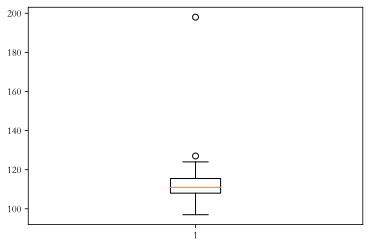

In [81]:
plt.boxplot(a)
plt.show()

In [82]:
# 查找异常值
def detect_outliers_iqr(data,whis = 1):
    q1 = np.quantile(data,0.25)
    q3 = np.quantile(data,0.75)
    iqr = q3 - q1
    lower = q1 - 3 * iqr
    upper = q3 + 3 * iqr
    return data[(data <= lower) | (data >= upper)]

In [83]:
detect_outliers_iqr(a)

array([198.])

In [84]:
def detect_outliers_zscore(data, threshold=3):
    avg_value = np.mean(data)
    std_value = np.std(data)
    z_score = np.abs((data - avg_value) / std_value)
    return data[z_score > threshold]

In [85]:
b = detect_outliers_zscore(a)

In [86]:
a = pd.Series(a)
a

0     112.0
1     115.0
2     103.0
3     112.0
4     108.0
5     111.0
6     113.0
7     113.0
8     110.0
9     120.0
10    112.0
11    117.0
12    106.0
13    109.0
14    110.0
15    105.0
16    115.0
17    116.0
18    108.0
19    109.0
20    120.0
21    108.0
22    117.0
23    110.0
24    110.0
25    113.0
26    107.0
27    111.0
28    114.0
29    127.0
30    117.0
31    105.0
32     97.0
33    105.0
34    116.0
35    108.0
36    115.0
37    124.0
38    120.0
39    100.0
40    111.0
41    117.0
42    110.0
43    112.0
44    108.0
45    113.0
46    108.0
47    116.0
48    109.0
49    198.0
50    110.0
dtype: float64

In [87]:
a.replace(198,110)

0     112.0
1     115.0
2     103.0
3     112.0
4     108.0
5     111.0
6     113.0
7     113.0
8     110.0
9     120.0
10    112.0
11    117.0
12    106.0
13    109.0
14    110.0
15    105.0
16    115.0
17    116.0
18    108.0
19    109.0
20    120.0
21    108.0
22    117.0
23    110.0
24    110.0
25    113.0
26    107.0
27    111.0
28    114.0
29    127.0
30    117.0
31    105.0
32     97.0
33    105.0
34    116.0
35    108.0
36    115.0
37    124.0
38    120.0
39    100.0
40    111.0
41    117.0
42    110.0
43    112.0
44    108.0
45    113.0
46    108.0
47    116.0
48    109.0
49    110.0
50    110.0
dtype: float64

In [88]:
df13 = pd.read_csv('../files/data/bilibili.csv',encoding='GBK')
df13

,title,url,watchnum,dm,uptime,upname
0,阿里云大学课程（云计算、中间件、大数据、云安全）,//www.bilibili.com/video/BV1Lv411s7wu?from=search,2954,4,2021/1/21,韭菜滚雪球
1,视觉传达设计专业的小朋友大学课程有哪些，强度怎么样，需要什么技能？学姐给新生的解答与建议,//www.bilibili.com/video/BV1Ea4y1a7CX?from=search,3526,8,2020/7/25,铧仔仔儿的奋斗史
2,CAP：适合高中生的大学课程（上大学之前提前学习大学的课程）同济大学《微积分CAP》,//www.bilibili.com/video/BV1X4411Y7u8?from=search,5597,17,2019/5/11,愚甘杂货铺
3,干货！论文读写系列｜写作风格：例文解析（1）｜人文社科｜教育学｜大学课程、知识,//www.bilibili.com/video/BV1VC4y1b7ZA?from=search,1.1万,29,2020/7/26,cici西西熙熙
4,《用户体验与心理-第1期》大学课程,//www.bilibili.com/video/BV1r7411M7gY?from=search,1373,9,2020/2/24,Luka老师
...,...,...,...,...,...,...
1902,【中国石油大学】构造地质学（第1-2章） ——主讲：李理老师,//www.bilibili.com/video/BV1Y4411x7sE?from=search,4097,5,2019/5/2,點點滴滴Super
1903,【模电】模拟电子技术基础【四】,//www.bilibili.com/video/BV1sb411v7E6?from=search,5997,11,2019/3/8,干脆的非洲鼓
1904,【模电】模拟电子技术基础【三】,//www.bilibili.com/video/BV1Rb411i7yo?from=search,4713,8,2019/3/5,干脆的非洲鼓
1905,结构化学-东北大学-王军,//www.bilibili.com/video/BV1yb411t7Mb?from=search,5835,2,2019/2/28,万万万万不能怂


In [89]:
from urllib.parse import urljoin

def fix_url(url):
    return urljoin('https:',url[:url.rfind('?')])

In [90]:
df13['url'] = df13['url'].apply(fix_url)
df13

,title,url,watchnum,dm,uptime,upname
0,阿里云大学课程（云计算、中间件、大数据、云安全）,https://www.bilibili.com/video/BV1Lv411s7wu,2954,4,2021/1/21,韭菜滚雪球
1,视觉传达设计专业的小朋友大学课程有哪些，强度怎么样，需要什么技能？学姐给新生的解答与建议,https://www.bilibili.com/video/BV1Ea4y1a7CX,3526,8,2020/7/25,铧仔仔儿的奋斗史
2,CAP：适合高中生的大学课程（上大学之前提前学习大学的课程）同济大学《微积分CAP》,https://www.bilibili.com/video/BV1X4411Y7u8,5597,17,2019/5/11,愚甘杂货铺
3,干货！论文读写系列｜写作风格：例文解析（1）｜人文社科｜教育学｜大学课程、知识,https://www.bilibili.com/video/BV1VC4y1b7ZA,1.1万,29,2020/7/26,cici西西熙熙
4,《用户体验与心理-第1期》大学课程,https://www.bilibili.com/video/BV1r7411M7gY,1373,9,2020/2/24,Luka老师
...,...,...,...,...,...,...
1902,【中国石油大学】构造地质学（第1-2章） ——主讲：李理老师,https://www.bilibili.com/video/BV1Y4411x7sE,4097,5,2019/5/2,點點滴滴Super
1903,【模电】模拟电子技术基础【四】,https://www.bilibili.com/video/BV1sb411v7E6,5997,11,2019/3/8,干脆的非洲鼓
1904,【模电】模拟电子技术基础【三】,https://www.bilibili.com/video/BV1Rb411i7yo,4713,8,2019/3/5,干脆的非洲鼓
1905,结构化学-东北大学-王军,https://www.bilibili.com/video/BV1yb411t7Mb,5835,2,2019/2/28,万万万万不能怂


In [91]:
def handle_watchnum(watchnum):
    unit_dict = {'万':10000,'亿':100000000}
    unit = unit_dict.get(watchnum[-1],1)
    if watchnum[-1] in unit_dict:
        watchnum = watchnum[:-1]
    return int(float(watchnum) * unit)

In [92]:
df13['watchnum'] = df13['watchnum'].apply(handle_watchnum)
df13

,title,url,watchnum,dm,uptime,upname
0,阿里云大学课程（云计算、中间件、大数据、云安全）,https://www.bilibili.com/video/BV1Lv411s7wu,2954,4,2021/1/21,韭菜滚雪球
1,视觉传达设计专业的小朋友大学课程有哪些，强度怎么样，需要什么技能？学姐给新生的解答与建议,https://www.bilibili.com/video/BV1Ea4y1a7CX,3526,8,2020/7/25,铧仔仔儿的奋斗史
2,CAP：适合高中生的大学课程（上大学之前提前学习大学的课程）同济大学《微积分CAP》,https://www.bilibili.com/video/BV1X4411Y7u8,5597,17,2019/5/11,愚甘杂货铺
3,干货！论文读写系列｜写作风格：例文解析（1）｜人文社科｜教育学｜大学课程、知识,https://www.bilibili.com/video/BV1VC4y1b7ZA,11000,29,2020/7/26,cici西西熙熙
4,《用户体验与心理-第1期》大学课程,https://www.bilibili.com/video/BV1r7411M7gY,1373,9,2020/2/24,Luka老师
...,...,...,...,...,...,...
1902,【中国石油大学】构造地质学（第1-2章） ——主讲：李理老师,https://www.bilibili.com/video/BV1Y4411x7sE,4097,5,2019/5/2,點點滴滴Super
1903,【模电】模拟电子技术基础【四】,https://www.bilibili.com/video/BV1sb411v7E6,5997,11,2019/3/8,干脆的非洲鼓
1904,【模电】模拟电子技术基础【三】,https://www.bilibili.com/video/BV1Rb411i7yo,4713,8,2019/3/5,干脆的非洲鼓
1905,结构化学-东北大学-王军,https://www.bilibili.com/video/BV1yb411t7Mb,5835,2,2019/2/28,万万万万不能怂


In [93]:
df13['uptime'] = pd.to_datetime(df13.uptime)
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     1907 non-null   object        
 1   url       1907 non-null   object        
 2   watchnum  1907 non-null   int64         
 3   dm        1907 non-null   object        
 4   uptime    1907 non-null   datetime64[ns]
 5   upname    1907 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 89.5+ KB


In [94]:
df13.uptime.dt.year

0       2021
1       2020
2       2019
3       2020
4       2020
        ... 
1902    2019
1903    2019
1904    2019
1905    2019
1906    2019
Name: uptime, Length: 1907, dtype: int64

### Pandas 对象的其他方法

#### 复合数据类型拆分

In [110]:
df_example = pd.DataFrame({
    "col1":[[1,2,3], [4,5,6]],
    "col2":[[1] * 3, [9] * 2]
})
df_example

,col1,col2
0,"[1, 2, 3]","[1, 1, 1]"
1,"[4, 5, 6]","[9, 9]"


In [111]:
df_example.explode(column='col1')

,col1,col2
0,1,"[1, 1, 1]"
0,2,"[1, 1, 1]"
0,3,"[1, 1, 1]"
1,4,"[9, 9]"
1,5,"[9, 9]"
1,6,"[9, 9]"


In [112]:
df_example['col2'].explode()

0    1
0    1
0    1
1    9
1    9
Name: col2, dtype: object

#### 窗口计算

In [113]:
ser_example = pd.Series(np.random.randint(10,100,10))
ser_example

0    48
1    80
2    77
3    66
4    59
5    72
6    71
7    97
8    86
9    33
dtype: int32

In [114]:
# rolling(N).聚合函数 - 前N个元素做运算(滚动步长为1)
ser_example.rolling(3).sum(),ser_example.rolling(5).mean()

(0      NaN
 1      NaN
 2    205.0
 3    223.0
 4    202.0
 5    197.0
 6    202.0
 7    240.0
 8    254.0
 9    216.0
 dtype: float64,
 0     NaN
 1     NaN
 2     NaN
 3     NaN
 4    66.0
 5    70.8
 6    69.0
 7    73.0
 8    77.0
 9    71.8
 dtype: float64)

#### 计算协方差 - 用于衡量两个变量的总体误差

**协方差**

协方差（covariance）：用于衡量两个随机变量的联合变化程度。如果变量$X$的较大值主要与另一个变量$Y$的较大值相对应，而两者较小值也相对应，那么两个变量倾向于表现出相似的行为，协方差为正。如果一个变量的较大值主要对应于另一个变量的较小值，则两个变量倾向于表现出相反的行为，协方差为负。简单的说，协方差的正负号显示着两个变量的相关性。方差是协方差的一种特殊情况，即变量与自身的协方差。

$$ cov(X,Y) = E((X - \mu)(Y - \upsilon)) = E(X \cdot Y) - \mu\upsilon $$

如果$X$和$Y$是统计独立的，那么二者的协方差为0，这是因为在$X$和$Y$独立的情况下：

$$ E(X \cdot Y) = E(X) \cdot E(Y) = \mu\upsilon $$

**相关系数**

协方差的数值大小取决于变量的大小，通常是不容易解释的，但是正态形式的协方差大小可以显示两变量线性关系的强弱。在统计学中，皮尔逊积矩相关系数用于度量两个变量$X$和$Y$之间的相关程度（线性相关），它的值介于-1到1之间。

$$ \rho_{X,Y} = \frac {cov(X, Y)} {\sigma_{X}\sigma_{Y}}$$

估算样本的协方差和标准差，可以得到样本皮尔逊系数，通常用英文小写字母$r$表示。

$$ r = \frac {\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})} {\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}} $$

等价的表达式为：

$$ r = \frac {1} {n - 1} \sum_{i=1}^n \left( \frac {X_i - \bar{X}} {\sigma_X} \right) \left( \frac {Y_i - \bar{Y}} {\sigma_{Y}} \right) $$
    
1. 皮尔逊相关系数
    
- 两个变量之间是线性关系，都是连续数据。
- 两个变量的总体是正态分布，或接近正态的单峰分布。
- 两个变量的观测值是成对的，每对观测值之间相互独立。
    
2. 斯皮尔曼相关系数
    
斯皮尔曼相关系数对数据条件的要求没有皮尔逊相关系数严格，只要两个变量的观测值是成对的等级评定资料，或者是由连续变量观测资料转化得到的等级资料，不论两个变量的总体分布形态、样本容量的大小如何，都可以用斯皮尔曼等级相关系数来进行研究。

In [108]:
# 安装/升级 scikit-learn 库
# !pip install -U scikit-learn

Looking in indexes: https://pypi.doubanio.com/simple


You should consider upgrading via the 'd:\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [115]:
# 忽略警告信息
import warnings

warnings.filterwarnings('ignore')

In [116]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [129]:
df_boston = pd.DataFrame(boston.data,columns= boston.feature_names)
df_boston['PRICE'] = boston.target
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [130]:
# 协方差
df_boston.cov()['PRICE']

CRIM       -30.718508
ZN          77.315176
INDUS      -30.520823
CHAS         0.409409
NOX         -0.455412
RM           4.493446
AGE        -97.589017
DIS          4.840229
RAD        -30.561228
TAX       -726.255716
PTRATIO    -10.110657
B          279.989834
LSTAT      -48.447538
PRICE       84.586724
Name: PRICE, dtype: float64

In [143]:
plt.get_cmap('RdYlBu')

In [135]:
df_boston.corr('spearman').style.background_gradient('spring')   # subset = ['PRICE'] - 指定某行上色

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


In [144]:
# !pip install pandas-datareader

Looking in indexes: https://pypi.doubanio.com/simple


You should consider upgrading via the 'd:\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [145]:
# 百度股票信息
import pandas_datareader as pdr

baidu_df = pdr.get_data_stooq('BIDU', start='2021-11-1', end='2021-12-8')
baidu_df.sort_index(inplace=True)
baidu_df

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-01,162.5400,170.5300,162.46,170.32,3922601
2021-11-02,166.1400,166.1400,161.33,162.27,4162546
2021-11-03,163.1500,165.5000,162.66,165.37,2482714
2021-11-04,167.0200,167.7800,162.28,162.58,3126021
2021-11-05,163.6777,163.6777,157.76,158.23,4272586
2021-11-08,159.6600,161.5800,158.41,161.42,2271899
2021-11-09,160.5200,162.8800,158.59,161.63,2405390
2021-11-10,161.7700,164.7500,160.62,161.56,3052889
2021-11-11,164.8800,168.8000,164.10,167.26,3121199


In [146]:
baidu_df.index

DatetimeIndex(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-26', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-06', '2021-12-07'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [147]:
baidu_df.Close.rolling(10).mean()

Date
2021-11-01        NaN
2021-11-02        NaN
2021-11-03        NaN
2021-11-04        NaN
2021-11-05        NaN
2021-11-08        NaN
2021-11-09        NaN
2021-11-10        NaN
2021-11-11        NaN
2021-11-12    164.121
2021-11-15    163.956
2021-11-16    164.856
2021-11-17    164.501
2021-11-18    163.679
2021-11-19    163.033
2021-11-22    161.672
2021-11-23    160.558
2021-11-24    159.541
2021-11-26    158.121
2021-11-29    156.093
2021-11-30    154.210
2021-12-01    151.966
2021-12-02    150.680
2021-12-03    148.983
2021-12-06    148.571
2021-12-07    148.779
Name: Close, dtype: float64

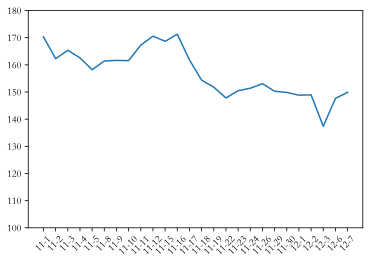

In [148]:
plt.plot(np.arange(baidu_df.index.size), baidu_df.Close)
plt.xticks(np.arange(baidu_df.index.size),
           rotation=45,
           labels=baidu_df.index.month.astype(str).values + '-' + baidu_df.index.day.astype(str).values)
plt.yticks(np.arange(100, 181, 10))
plt.show()

### Index 对象

In [149]:
# 范围索引
sales_data = np.random.randint(400, 1000, 12)
month_index = pd.RangeIndex(1, 13, name='月份')
ser = pd.Series(data=sales_data, index=month_index)
ser

月份
1     719
2     495
3     528
4     513
5     947
6     934
7     759
8     705
9     704
10    491
11    473
12    528
dtype: int32

In [150]:
ser.index

RangeIndex(start=1, stop=13, step=1, name='月份')

In [151]:
# 多级索引
ids = np.arange(1001, 1006)
sms = ['期中', '期末']
index = pd.MultiIndex.from_product((ids, sms), names=['学号', '学期'])
courses = ['语文', '数学', '英语']
scores = np.random.randint(60, 101, (10, 3))
df = pd.DataFrame(data=scores, columns=courses, index=index)
df

语文   数学  英语
学号   学期             
1001 期中  71   87  95
     期末  62  100  95
1002 期中  66   96  97
     期末  78   83  67
1003 期中  88   87  71
     期末  96   94  62
1004 期中  85   88  84
     期末  69   72  87
1005 期中  68   66  94
     期末  75   92  63

In [152]:
df.reset_index(level=1)

,学期,语文,数学,英语
学号,,,,
1001,期中,71,87,95
1001,期末,62,100,95
1002,期中,66,96,97
1002,期末,78,83,67
1003,期中,88,87,71
1003,期末,96,94,62
1004,期中,85,88,84
1004,期末,69,72,87
1005,期中,68,66,94


In [162]:
pd.date_range('2021-1-1', '2021-6-1', periods=10)   # 在指定时间区间取指定周期(个数)的日期

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-17 18:40:00',
               '2021-02-03 13:20:00', '2021-02-20 08:00:00',
               '2021-03-09 02:40:00', '2021-03-25 21:20:00',
               '2021-04-11 16:00:00', '2021-04-28 10:40:00',
               '2021-05-15 05:20:00', '2021-06-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [154]:
temp = pd.date_range('2021-1-1', '2021-6-1', freq='W')   # 在指定时间区间以指定频率取日期
temp

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21',
               '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
               '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30'],
              dtype='datetime64[ns]', freq='W-SUN')

In [165]:
temp - pd.DateOffset(days=2)   # 序列中所有日期减去指定天数(days = 2),这个参数也可以设置为months、years

DatetimeIndex(['2021-01-01', '2021-01-08', '2021-01-15', '2021-01-22',
               '2021-01-29', '2021-02-05', '2021-02-12', '2021-02-19',
               '2021-02-26', '2021-03-05', '2021-03-12', '2021-03-19',
               '2021-03-26', '2021-04-02', '2021-04-09', '2021-04-16',
               '2021-04-23', '2021-04-30', '2021-05-07', '2021-05-14',
               '2021-05-21', '2021-05-28'],
              dtype='datetime64[ns]', freq=None)

In [156]:
temp + pd.DateOffset(days=2)   # 序列中所有日期加上指定天数(days = 2),这个参数也可以设置为months、years

DatetimeIndex(['2021-01-05', '2021-01-12', '2021-01-19', '2021-01-26',
               '2021-02-02', '2021-02-09', '2021-02-16', '2021-02-23',
               '2021-03-02', '2021-03-09', '2021-03-16', '2021-03-23',
               '2021-03-30', '2021-04-06', '2021-04-13', '2021-04-20',
               '2021-04-27', '2021-05-04', '2021-05-11', '2021-05-18',
               '2021-05-25', '2021-06-01'],
              dtype='datetime64[ns]', freq=None)

In [157]:
baidu_df.shift(3, fill_value=0)   # 将数据按照时间下标平移指定周期(3天)，用0填充空缺值

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-01,0.0000,0.0000,0.00,0.00,0
2021-11-02,0.0000,0.0000,0.00,0.00,0
2021-11-03,0.0000,0.0000,0.00,0.00,0
2021-11-04,162.5400,170.5300,162.46,170.32,3922601
2021-11-05,166.1400,166.1400,161.33,162.27,4162546
2021-11-08,163.1500,165.5000,162.66,165.37,2482714
2021-11-09,167.0200,167.7800,162.28,162.58,3126021
2021-11-10,163.6777,163.6777,157.76,158.23,4272586
2021-11-11,159.6600,161.5800,158.41,161.42,2271899


In [158]:
baidu_df.asfreq('10D', method='ffill')   # 以指定频率(10D)提取数据，空缺值使用前/后(method = 'ffill'/'bfill')一数据填充

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-01,162.54,170.53,162.46,170.32,3922601
2021-11-11,164.88,168.80,164.10,167.26,3121199
2021-11-21,154.11,154.90,151.04,151.77,3989447
2021-12-01,150.66,152.00,147.51,148.83,4139282


In [159]:
baidu_df.resample('1M').mean()   # 将数据按月划分(M:月；D：天；Y：年)，划分后本身是个迭代对象。可作用聚合函数

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-30,160.1137,162.353224,157.144762,159.618095,3.593994e+06
2021-12-31,145.4680,149.312000,141.612000,146.544000,5.764081e+06


In [160]:
baidu_df.resample('10D').Volume.sum()

Date
2021-11-01    25696646
2021-11-11    27485479
2021-11-21    22291758
2021-12-01    28820405
Freq: 10D, Name: Volume, dtype: int64